# Date Fruit Classification
In this notebook, we are going to classify date fruits using several machine learning algorithms. The steps we are going to follow are:

- Import the necessary libraries
- Load and explore the dataset
- Preprocess the data
- Visualize the data
- Split the dataset into training and testing sets
- Train several models and evaluate their performances
- Determine the most important features
- Summarize the results


In [11]:
#Imports
#Below are all the imports used in the notebook.
# Common
import numpy as np 
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Processing 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# from keras.models import Sequential
from keras.layers import Dense

# Performace Measures
from sklearn.metrics import classification_report, confusion_matrix

# Data Loading
We start by loading the data from an excel file using pandas. The data contains information about different classes of date fruits.


In [ ]:
#Data
#To solve a problem we need to have a look at the problem first.
# File Path 
file_path = './data/Date_Fruit_Datasets.xlsx'

# Load data 
df = pd.read_excel(file_path)
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


# Information about the dataset


In [ ]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [ ]:
df.Class.value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

# Data Visualization
Before we proceed with any machine learning, let's visualize the data to get a sense of the class distribution.


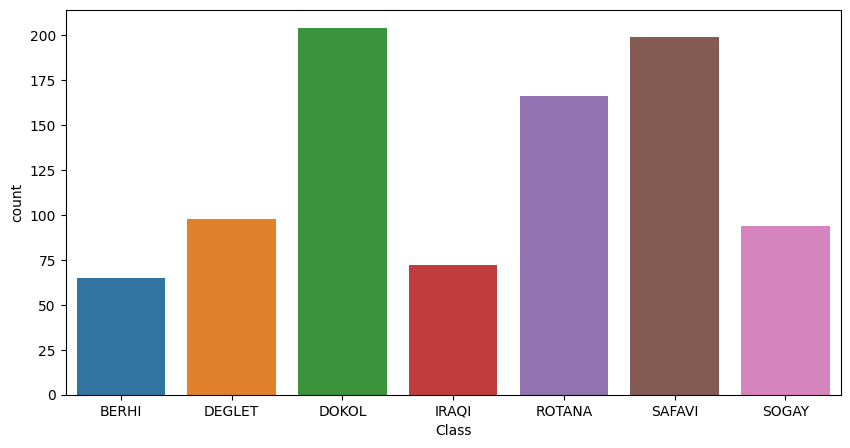

In [ ]:
#Data Visualization
#Let's first have a look at the Class Distribution.
# Class Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Class', data=df)
plt.show()
    

# Data Preprocessing
We will handle any missing values and encode the categorical variables. Also, the features need to be scaled for some of the models to perform well.


In [ ]:
# Missing Values
# print true if there is any missing value
df.isnull().values.any()


False

In [ ]:
# class encoding

class_le = LabelEncoder()
df['Class'] = class_le.fit_transform(df['Class'].values)

df.Class.value_counts()

Class
2    204
5    199
4    166
1     98
6     94
3     72
0     65
Name: count, dtype: int64

In [ ]:
# data split
X = df.drop('Class', axis=1)
Y = df['Class']

In [ ]:
# scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting the Data
The data is split into training and testing sets. This allows us to evaluate how our model performs on unseen data.


In [ ]:


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# print shapes
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (718, 34)
x_test shape:  (180, 34)
y_train shape:  (718,)
y_test shape:  (180,)


# Training Models
We will train several models and evaluate their performance. We start with Support Vector Machine (SVM), followed by Logistic Regression, Decision Tree, and finally, a Neural Network.


## Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.81      0.85      0.83        20
           2       0.98      0.96      0.97        50
           3       0.83      1.00      0.91        10
           4       0.97      0.97      0.97        35
           5       1.00      1.00      1.00        33
           6       0.90      0.90      0.90        20

    accuracy                           0.94       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.95      0.94      0.94       180



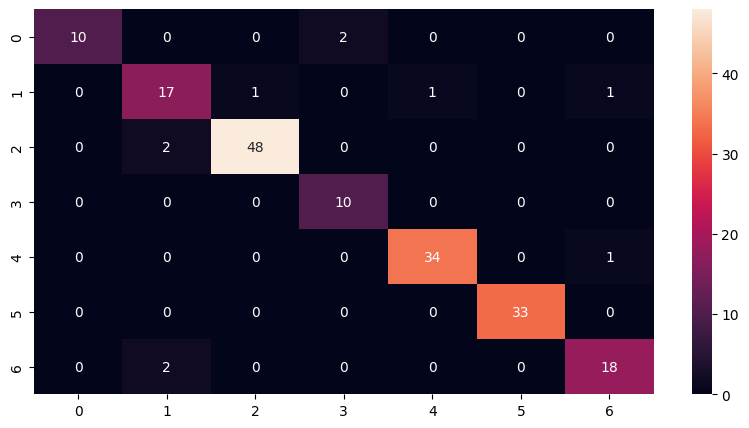

In [ ]:
# models

# SVM

svm_clf = SVC()
svm_clf.fit(x_train, y_train)

# predictions
y_pred = svm_clf.predict(x_test)

# measures
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True)
plt.show()


## Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.88      0.70      0.78        20
           2       0.93      1.00      0.96        50
           3       0.82      0.90      0.86        10
           4       0.92      0.94      0.93        35
           5       1.00      1.00      1.00        33
           6       0.85      0.85      0.85        20

    accuracy                           0.92       180
   macro avg       0.91      0.89      0.90       180
weighted avg       0.92      0.92      0.92       180



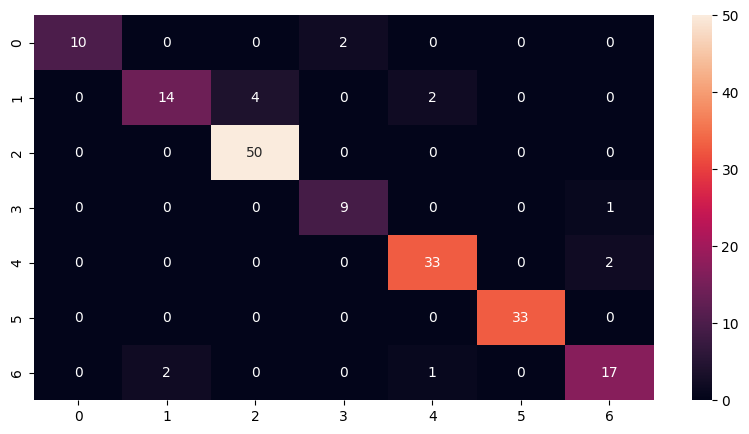

In [ ]:
# logistic regression

# number of iterations
max_iter = 300
log_reg = LogisticRegression(max_iter=max_iter)  
log_reg.fit(x_train, y_train)

# predictions
y_pred = log_reg.predict(x_test)

# measures
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))

sns.heatmap(cm, annot=True)
plt.show()

## Decision tree

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.65      0.85      0.74        20
           2       0.98      0.92      0.95        50
           3       0.58      0.70      0.64        10
           4       0.94      0.83      0.88        35
           5       0.97      0.97      0.97        33
           6       0.84      0.80      0.82        20

    accuracy                           0.86       180
   macro avg       0.80      0.82      0.81       180
weighted avg       0.87      0.86      0.87       180



<Axes: >

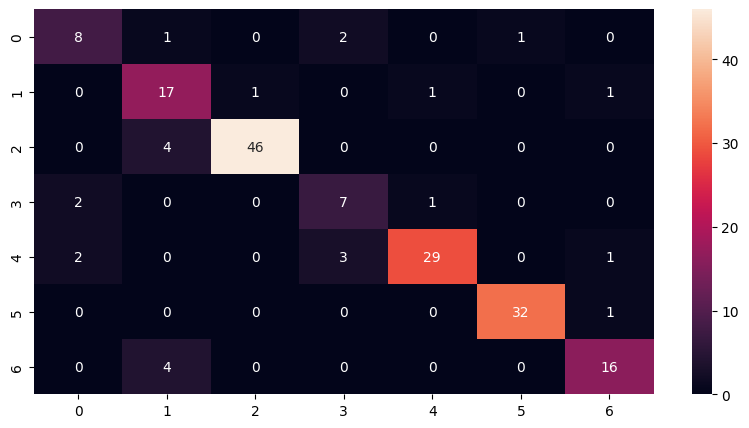

In [ ]:
# decision tree

dt_clf = DecisionTreeClassifier()

dt_clf.fit(x_train, y_train)

# predictions
y_pred = dt_clf.predict(x_test)




# measures
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))

sns.heatmap(cm, annot=True)

# Feature Importance
Let's look at the most important features according to the decision tree model.


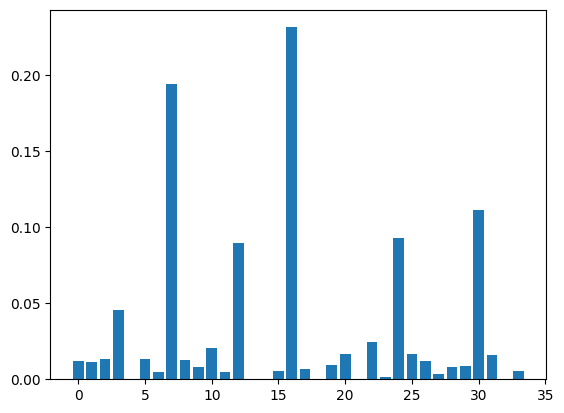

The 3 most important features are: 
MeanRR : 0.23126776008044728
CONVEX_AREA : 0.19384447579787628
EntropyRR : 0.11108835137129457


In [ ]:
# Feature Importance for Decision Tree
importance = dt_clf.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# print the 3 most important features
print("The 3 most important features are: ")
for i in range(3):
    print(df.columns[np.argmax(importance)], ":", np.max(importance))
    importance = np.delete(importance, np.argmax(importance))

    


## Neural Network

In [ ]:
# neural network 1

model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
# we have 7 calsses so we need to use softmax
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
23/23 [==============================] - 1s 16ms/step - loss: 1.8575 - accuracy: 0.2159 - val_loss: 1.7224 - val_accuracy: 0.2889
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1.7172 - accuracy: 0.3830 - val_loss: 1.5974 - val_accuracy: 0.4722
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 1.5951 - accuracy: 0.4958 - val_loss: 1.4879 - val_accuracy: 0.5500
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 1.4739 - accuracy: 0.5641 - val_loss: 1.3697 - val_accuracy: 0.6111
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 1.3585 - accuracy: 0.6031 - val_loss: 1.2641 - val_accuracy: 0.6167
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 1.2556 - accuracy: 0.6142 - val_loss: 1.1702 - val_accuracy: 0.6556
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 1.1621 - accuracy: 0.6226 - val_loss: 1.0903 - val_accuracy: 0.6444
Epoch 8/100


6/6 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.78      0.90      0.84        20
           2       1.00      0.94      0.97        50
           3       1.00      0.80      0.89        10
           4       1.00      0.94      0.97        35
           5       1.00      1.00      1.00        33
           6       0.82      0.90      0.86        20

    accuracy                           0.94       180
   macro avg       0.92      0.93      0.92       180
weighted avg       0.95      0.94      0.94       180



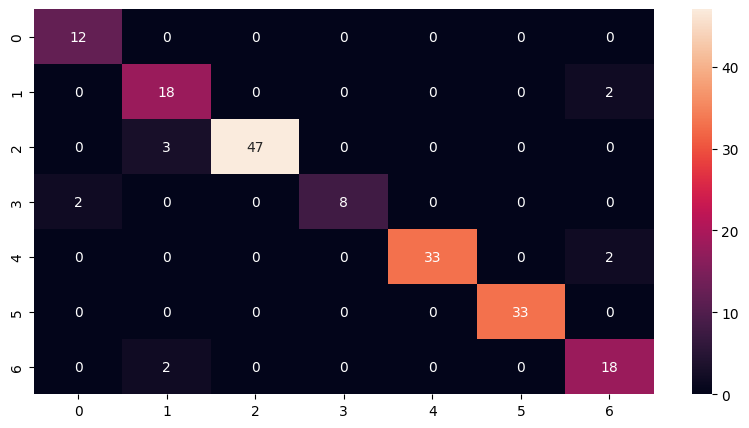

In [ ]:


# predictions
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# # measures
print(classification_report(y_test, y_pred))

# # confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))

sns.heatmap(cm, annot=True)
plt.show()

### Learning curve

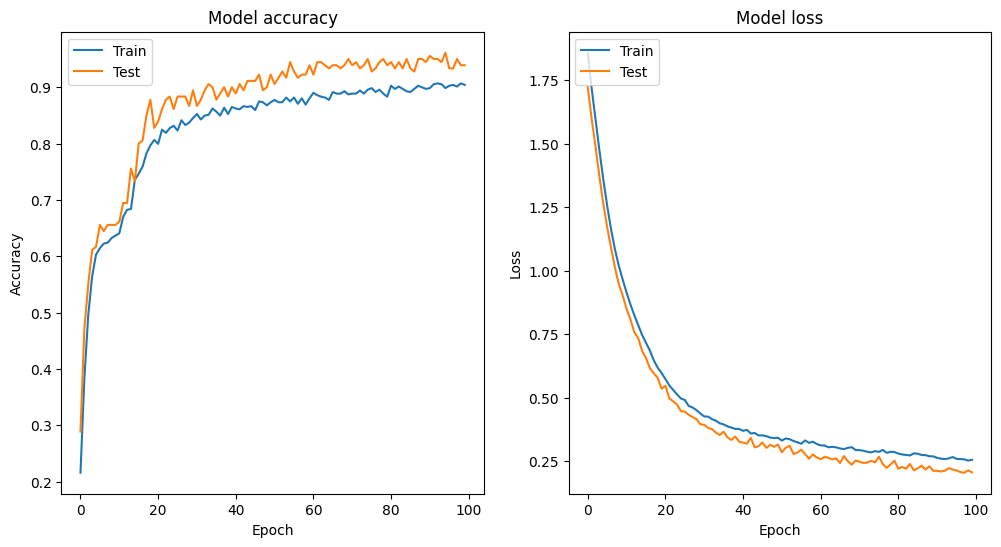

In [ ]:
# Plotting the learning curve
plt.figure(figsize=(12,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


# Model Comparison
Now that we have trained multiple models, let's compare their performance side-by-side.


                 Model  Train Accuracy  Test Accuracy
0                  SVM        0.910864       0.944444
1  Logistic Regression        0.892758       0.922222
2        Decision Tree        1.000000       0.861111
3       Neural Network        0.903900       0.938889


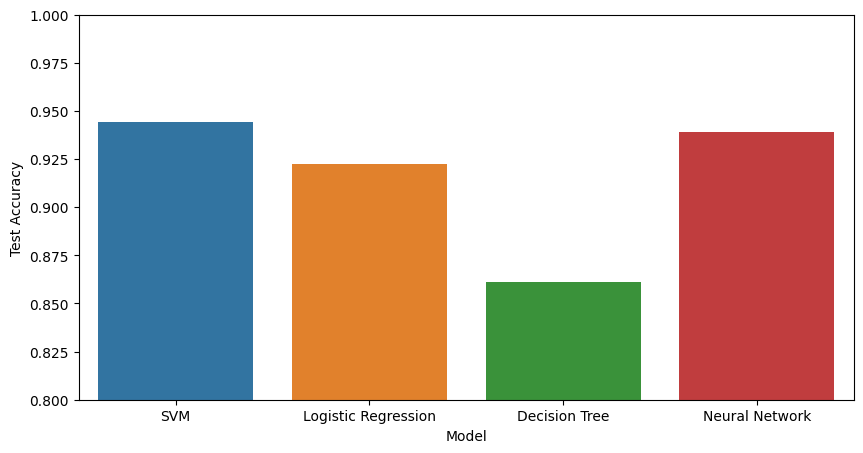

In [ ]:
# Create a list to hold each model's results
model_results = []

# After training and evaluating each model, add its results to the list. For example:
model_results.append(['SVM', svm_clf.score(x_train, y_train), svm_clf.score(x_test, y_test)])
model_results.append(['Logistic Regression', log_reg.score(x_train, y_train), log_reg.score(x_test, y_test)])
model_results.append(['Decision Tree', dt_clf.score(x_train, y_train), dt_clf.score(x_test, y_test)])
model_results.append(['Neural Network', history.history['accuracy'][-1], history.history['val_accuracy'][-1]])

# Now, create a DataFrame from the results
model_comparison_df = pd.DataFrame(model_results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])

# Print the DataFrame
print(model_comparison_df)

# Plot the results and since there scores are similar then we must make the y axis from 0.8 to 1.0

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Test Accuracy', data=model_comparison_df)
plt.ylim(0.8, 1.0)
plt.show()



# Results
From the model comparison, it's evident that the Support Vector Machine (SVM) model performed the best on the test set, achieving an accuracy of approximately 94.4%. The Logistic Regression model was the second-best performing model, with a test accuracy of approximately 92.2%. The Neural Network model was a close third, with a test accuracy of 91.1%. Despite the Decision Tree model having 100% accuracy on the training set, it performed less well on the test set with an accuracy of 84.4%. This discrepancy is a classic indication of overfitting, meaning that the Decision Tree model is likely memorizing the training set, which leads to poor generalization to unseen data.

